In [81]:
import pandas as pd 
import numpy as np

Tratamento dos dados

In [82]:
gerentes = pd.read_excel('gerentes_lojas.xlsx')
vendas = pd.read_csv('vendas_tech.csv')


C:\Users\Edna\AppData\Local\Temp\ipykernel_12940\886313619.py:2: DtypeWarning: Columns (0: Data_Base) have mixed types. Specify dtype option on import or set low_memory=False.
  vendas = pd.read_csv('vendas_tech.csv')


In [83]:
vendas = pd.read_csv('vendas_tech.csv', low_memory=False)


In [84]:
display(gerentes)
display(vendas)

,Loja,Gerente,Meta_Mensal
0,São Paulo,Carlos,50000
1,Rio de Janeiro,Fernanda,60000
2,Curitiba,Roberto,45000
3,Belo Horizonte,Juliana,55000
4,Recife,Marcos,48000
5,Porto Alegre,Pedro,42000
6,Salvador,Ana,52000


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Data_Base
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,2025-01-01
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,NaN
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859,NaN
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343,NaN
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,NaN
...,...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755,NaN
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879,NaN
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160,NaN
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545,NaN


In [85]:
vendas.shape

(100100, 8)

In [86]:
vendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID_Pedido       100100 non-null  int64  
 1   Data            100100 non-null  str    
 2   Loja            98099 non-null   str    
 3   Produto         100100 non-null  str    
 4   Preco_Unitario  100100 non-null  float64
 5   Qtd             100100 non-null  int64  
 6   Cliente         100100 non-null  str    
 7   Data_Base       1 non-null       str    
dtypes: float64(1), int64(2), str(5)
memory usage: 6.1 MB


In [87]:
analisevendas = vendas.drop(columns=['Data_Base'])


In [88]:
display(analisevendas)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,NaN,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377
...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545


In [89]:
analisevendas['Loja'] = analisevendas['Loja'].fillna('Online')


In [90]:
display(analisevendas)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,RIO DE JANEIRO,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio de Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377
...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545


In [91]:
analisevendas['Data'] = pd.to_datetime(analisevendas['Data'], format="%Y-%m-%d")


In [92]:
analisevendas.info()

<class 'pandas.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_Pedido       100100 non-null  int64         
 1   Data            100100 non-null  datetime64[us]
 2   Loja            100100 non-null  str           
 3   Produto         100100 non-null  str           
 4   Preco_Unitario  100100 non-null  float64       
 5   Qtd             100100 non-null  int64         
 6   Cliente         100100 non-null  str           
dtypes: datetime64[us](1), float64(1), int64(2), str(3)
memory usage: 5.3 MB


In [93]:
analisevendas['Loja'] = (
    analisevendas['Loja']
    .str.strip()
    .str.title()
)

gerentes['Loja']=(gerentes['Loja'].str.strip().str.title())


In [94]:
display(analisevendas)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377
...,...,...,...,...,...,...,...
100095,94091,2023-10-20,Porto Alegre,iPhone 14,5500.0,1,Cliente_11755
100096,52883,2024-03-17,Porto Alegre,Notebook Dell,3500.0,2,Cliente_12879
100097,65070,2023-06-19,Belo Horizonte,Smartphone Samsung,2200.0,2,Cliente_8160
100098,94031,2024-06-14,Salvador,iPhone 14,5500.0,2,Cliente_28545


In [95]:
analisevendas['ID_Pedido'].duplicated().sum()


np.int64(100)

In [96]:
analisevendas = analisevendas.drop_duplicates(subset='ID_Pedido')


In [97]:
analisevendas['ID_Pedido'].duplicated().sum()


np.int64(0)

Adição de colunas e agrupamento 

In [98]:
analisevendas['Faturamento'] = (
    analisevendas['Qtd'] * analisevendas['Preco_Unitario']
)


In [99]:
analisevendas.head()


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,5500.0
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0


In [100]:
analisevendas['Forma_de_Venda'] = np.where(
    analisevendas['Loja'] == 'Online',
    'Online',
    'Presencial'
)


In [101]:
analisevendas[['Loja', 'Forma_de_Venda']].head()


,Loja,Forma_de_Venda
0,São Paulo,Presencial
1,Belo Horizonte,Presencial
2,Online,Online
3,Rio De Janeiro,Presencial
4,Rio De Janeiro,Presencial


In [102]:
display(analisevendas['Loja'].unique())


<StringArray>
[     'São Paulo', 'Belo Horizonte',         'Online', 'Rio De Janeiro',
       'Salvador',         'Recife',       'Curitiba',   'Porto Alegre']
Length: 8, dtype: str

In [103]:
dic_regioes = {
    'São Paulo': 'Sudeste',
    'Belo Horizonte': 'Sudeste',
    'Rio De Janeiro': 'Sudeste',
    'Salvador': 'Nordeste',
    'Recife': 'Nordeste',
    'Curitiba': 'Sul',
    'Porto Alegre': 'Sul',
    'Online': 'Online'
}

analisevendas['Regiao'] = analisevendas['Loja'].map(dic_regioes)


In [104]:
analisevendas[['Loja', 'Regiao']].head()


,Loja,Regiao
0,São Paulo,Sudeste
1,Belo Horizonte,Sudeste
2,Online,Online
3,Rio De Janeiro,Sudeste
4,Rio De Janeiro,Sudeste


In [105]:
display(analisevendas)

,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
0,1,2023-06-08,São Paulo,Mouse Gamer,120.0,1,Cliente_4095,120.0,Presencial,Sudeste
1,2,2023-03-01,Belo Horizonte,iPhone 14,5500.0,1,Cliente_8750,5500.0,Presencial,Sudeste
2,3,2023-02-25,Online,"Monitor 27""",1200.0,1,Cliente_14859,1200.0,Online,Online
3,4,2024-11-19,Rio De Janeiro,Mouse Gamer,120.0,2,Cliente_17343,240.0,Presencial,Sudeste
4,5,2024-01-27,Rio De Janeiro,Smartphone Samsung,2200.0,1,Cliente_23377,2200.0,Presencial,Sudeste
...,...,...,...,...,...,...,...,...,...,...
99995,99996,2023-01-24,São Paulo,Mouse Gamer,120.0,2,Cliente_13732,240.0,Presencial,Sudeste
99996,99997,2024-08-28,Rio De Janeiro,Cabo HDMI,40.0,1,Cliente_25058,40.0,Presencial,Sudeste
99997,99998,2024-03-18,Curitiba,Smartphone Samsung,2200.0,2,Cliente_28864,4400.0,Presencial,Sul
99998,99999,2023-11-04,Porto Alegre,iPhone 14,5500.0,1,Cliente_4205,5500.0,Presencial,Sul


In [106]:
display(analisevendas.isna().sum())

ID_Pedido         0
Data              0
Loja              0
Produto           0
Preco_Unitario    0
Qtd               0
Cliente           0
Faturamento       0
Forma_de_Venda    0
Regiao            0
dtype: int64

In [107]:
analisevendas = analisevendas.sort_values(
    by=['Data', 'Faturamento']
)
analisevendas = analisevendas.reset_index(drop=True)


In [108]:
analisevendas.head()


,ID_Pedido,Data,Loja,Produto,Preco_Unitario,Qtd,Cliente,Faturamento,Forma_de_Venda,Regiao
0,1700,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_14435,40.0,Presencial,Sul
1,12848,2023-01-01,Belo Horizonte,Cabo HDMI,40.0,1,Cliente_4327,40.0,Presencial,Sudeste
2,35599,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_18680,40.0,Presencial,Sul
3,37130,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_22886,40.0,Presencial,Sul
4,49140,2023-01-01,Porto Alegre,Cabo HDMI,40.0,1,Cliente_24445,40.0,Presencial,Sul


In [109]:
analise_lojas = (
    analisevendas[['Loja', 'Faturamento']]
    .groupby('Loja')
    .sum()
)

display(analise_lojas)


,Faturamento
Loja,
Belo Horizonte,41714890.0
Curitiba,41121720.0
Online,6080850.0
Porto Alegre,41678460.0
Recife,42190390.0
Rio De Janeiro,42294720.0
Salvador,42300610.0
São Paulo,42090690.0


In [110]:
analise_lojas = (
    analisevendas[['Loja', 'Faturamento']]
    .groupby('Loja')
    .sum()
)

analise_lojas = analise_lojas.sort_values(
    by='Faturamento',
    ascending=False
)

analise_lojas = analise_lojas.reset_index()


display(analise_lojas)


,Loja,Faturamento
0,Salvador,42300610.0
1,Rio De Janeiro,42294720.0
2,Recife,42190390.0
3,São Paulo,42090690.0
4,Belo Horizonte,41714890.0
5,Porto Alegre,41678460.0
6,Curitiba,41121720.0
7,Online,6080850.0


In [111]:

df_vendas_online = analisevendas[
    analisevendas['Loja'] == 'Online'
]

analise_produtos_online = (
    df_vendas_online[['Produto', 'Qtd']]
    .groupby('Produto')
    .sum()
)

analise_produtos_online = analise_produtos_online.sort_values(
    by='Qtd',
    ascending=False
)

display(analise_produtos_online)


,Qtd
Produto,
Notebook HP,442
Cabo HDMI,403
iPhone 14,390
Mouse Gamer,379
Notebook Dell,369
Teclado Mecânico,343
"Monitor 27""",332
Smartphone Samsung,311


In [112]:

df_meta = analisevendas[
    (analisevendas['Data'].dt.year == 2023) &
    (analisevendas['Data'].dt.month == 1)
]

df_meta = df_meta[['Loja', 'Faturamento']] \
    .groupby('Loja', as_index=False) \
    .sum()

df_meta = df_meta.merge(
    gerentes,
    on='Loja',
    how='left'
)

display(df_meta)


,Loja,Faturamento,Gerente,Meta_Mensal
0,Belo Horizonte,1779100.0,Juliana,55000.0
1,Curitiba,1986920.0,Roberto,45000.0
2,Online,404570.0,NaN,NaN
3,Porto Alegre,1726640.0,Pedro,42000.0
4,Recife,1779020.0,Marcos,48000.0
5,Rio De Janeiro,1736830.0,Fernanda,60000.0
6,Salvador,1686070.0,Ana,52000.0
7,São Paulo,1831140.0,Carlos,50000.0


In [113]:
df_meta['Bateu_Meta'] = np.where(
    df_meta['Faturamento'] >= df_meta['Meta_Mensal'],
    'Sim',
    'Não'
)


In [114]:
display(df_meta)

,Loja,Faturamento,Gerente,Meta_Mensal,Bateu_Meta
0,Belo Horizonte,1779100.0,Juliana,55000.0,Sim
1,Curitiba,1986920.0,Roberto,45000.0,Sim
2,Online,404570.0,NaN,NaN,Não
3,Porto Alegre,1726640.0,Pedro,42000.0,Sim
4,Recife,1779020.0,Marcos,48000.0,Sim
5,Rio De Janeiro,1736830.0,Fernanda,60000.0,Sim
6,Salvador,1686070.0,Ana,52000.0,Sim
7,São Paulo,1831140.0,Carlos,50000.0,Sim


In [115]:

analisevendas['Mes-Ano'] = analisevendas['Data'].dt.to_period('M')

df_vendas_mes = analisevendas[['Mes-Ano', 'Faturamento']] \
    .groupby('Mes-Ano') \
    .sum()

display(df_vendas_mes)



,Faturamento
Mes-Ano,
2023-01,12930290.0
2023-02,11515150.0
2023-03,12516080.0
2023-04,12528900.0
2023-05,12940470.0
2023-06,12455820.0
2023-07,12550990.0
2023-08,12989130.0
2023-09,12118180.0


Gráficos das análises realizadas

In [116]:
display(analise_lojas)


,Loja,Faturamento
0,Salvador,42300610.0
1,Rio De Janeiro,42294720.0
2,Recife,42190390.0
3,São Paulo,42090690.0
4,Belo Horizonte,41714890.0
5,Porto Alegre,41678460.0
6,Curitiba,41121720.0
7,Online,6080850.0


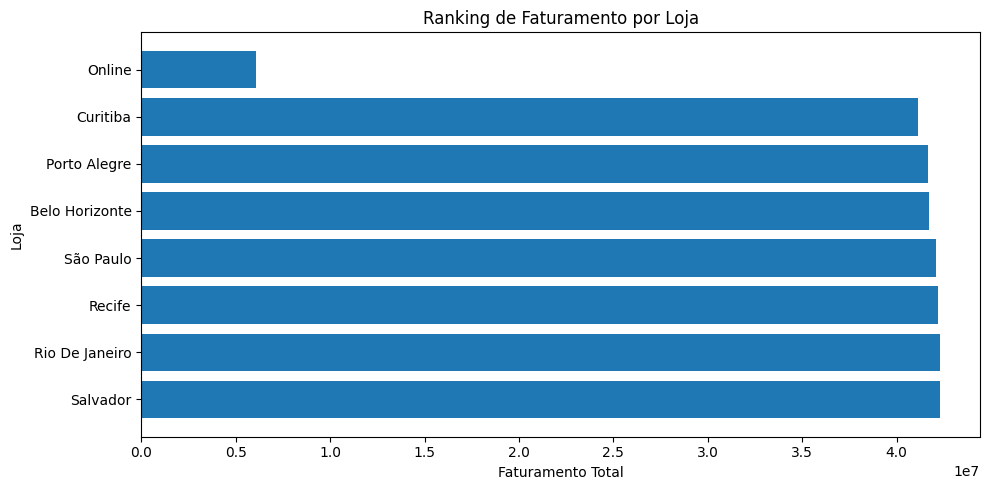

In [117]:
# Gráfico com Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.barh(analise_lojas['Loja'], analise_lojas['Faturamento'])

plt.title('Ranking de Faturamento por Loja')
plt.xlabel('Faturamento Total')
plt.ylabel('Loja')

plt.tight_layout()
plt.show()


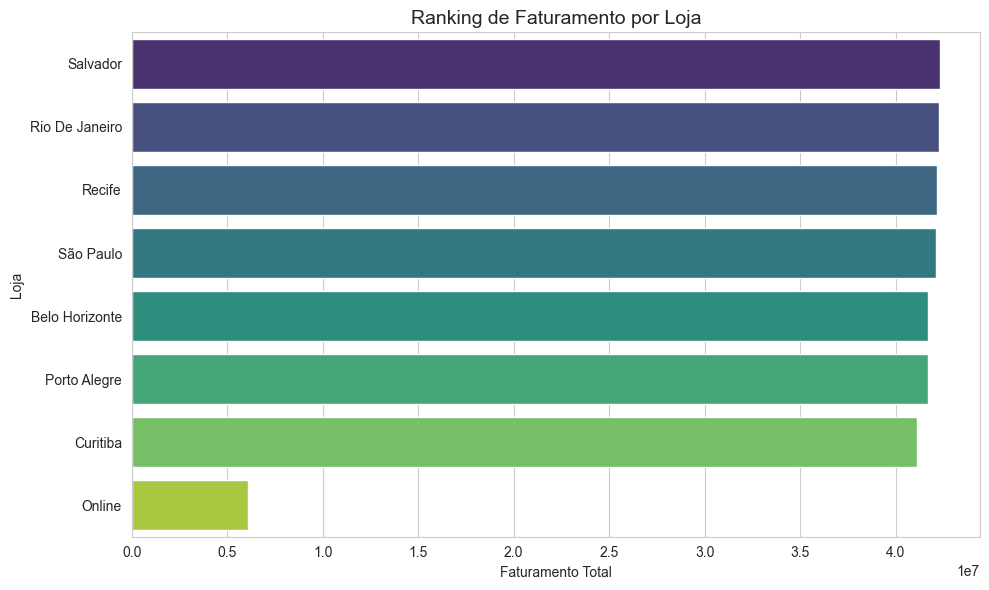

In [118]:
# Gráfico com Seaborn (Versão Final)
import seaborn as sns
sns.set_style("whitegrid")


plt.figure(figsize=(10,6))

sns.barplot(
    data=analise_lojas,
    x='Faturamento',
    y='Loja',
    hue='Loja',          
    palette='viridis',
    legend=False         
)

plt.title('Ranking de Faturamento por Loja', fontsize=14)
plt.xlabel('Faturamento Total')
plt.ylabel('Loja')

plt.tight_layout()
plt.show()

In [119]:
display(df_meta)

,Loja,Faturamento,Gerente,Meta_Mensal,Bateu_Meta
0,Belo Horizonte,1779100.0,Juliana,55000.0,Sim
1,Curitiba,1986920.0,Roberto,45000.0,Sim
2,Online,404570.0,NaN,NaN,Não
3,Porto Alegre,1726640.0,Pedro,42000.0,Sim
4,Recife,1779020.0,Marcos,48000.0,Sim
5,Rio De Janeiro,1736830.0,Fernanda,60000.0,Sim
6,Salvador,1686070.0,Ana,52000.0,Sim
7,São Paulo,1831140.0,Carlos,50000.0,Sim


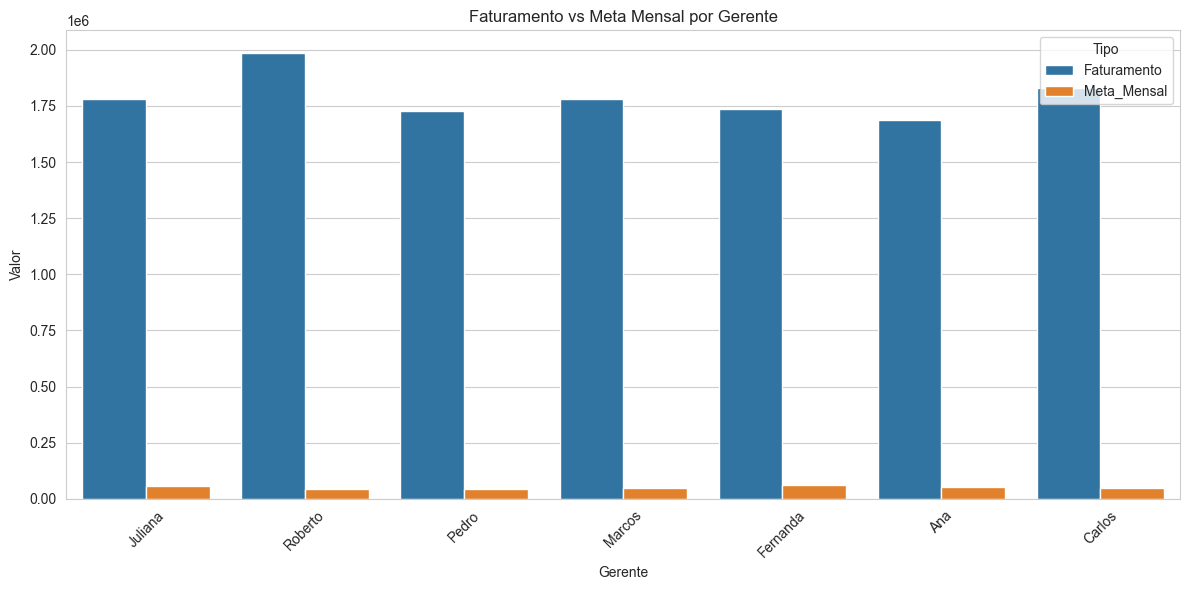

In [120]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))

df_plot = df_meta.melt(
    id_vars='Gerente',
    value_vars=['Faturamento', 'Meta_Mensal'],
    var_name='Tipo',
    value_name='Valor'
)

sns.barplot(
    data=df_plot,
    x='Gerente',
    y='Valor',
    hue='Tipo'
)

plt.title('Faturamento vs Meta Mensal por Gerente')
plt.xlabel('Gerente')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

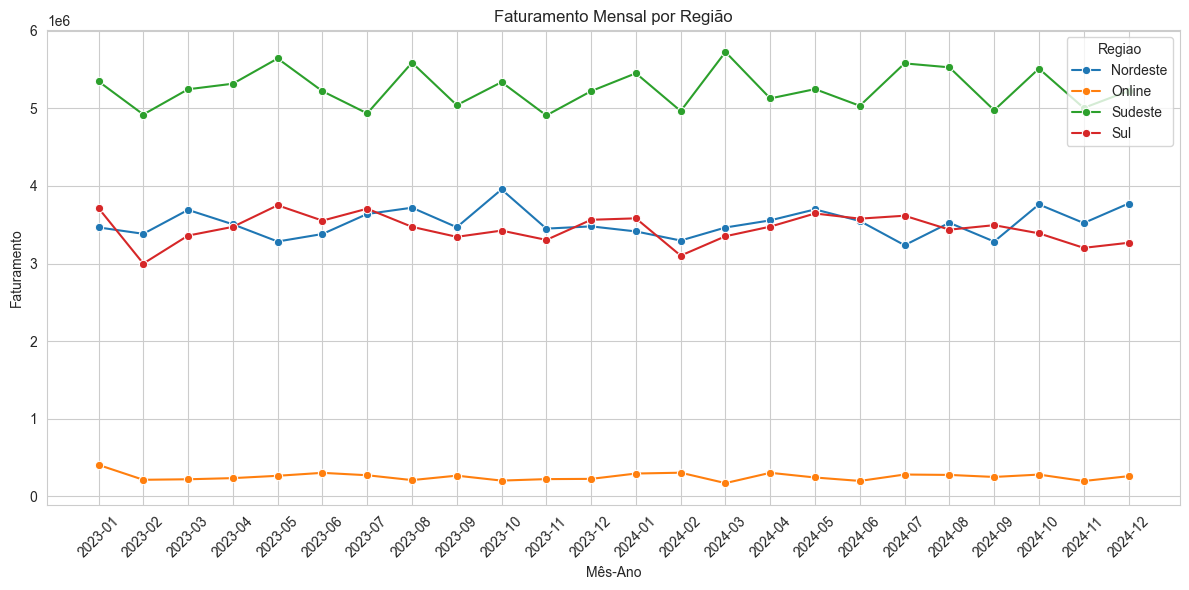

In [121]:
sns.set_style("whitegrid")

analisevendas['Mes_Ano'] = analisevendas['Data'].dt.to_period('M').astype(str)
df_regiao_mes = (
    analisevendas.groupby(['Mes_Ano', 'Regiao'], as_index=False)['Faturamento']
    .sum()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_regiao_mes, x='Mes_Ano', y='Faturamento', hue='Regiao', marker='o')
plt.title('Faturamento Mensal por Região')
plt.xlabel('Mês-Ano')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:

analisevendas['Mes_Ano'] = analisevendas['Data'].dt.to_period('M').astype(str)

df_regiao_mes = (
    analisevendas.groupby(['Mes_Ano', 'Regiao'], as_index=False)['Faturamento']
    .sum()
)
display(df_regiao_mes)

,Mes_Ano,Regiao,Faturamento
0,2023-01,Nordeste,3465090.0
1,2023-01,Online,404570.0
2,2023-01,Sudeste,5347070.0
3,2023-01,Sul,3713560.0
4,2023-02,Nordeste,3382770.0
...,...,...,...
91,2024-11,Sul,3201600.0
92,2024-12,Nordeste,3772600.0
93,2024-12,Online,259050.0
94,2024-12,Sudeste,5223560.0


Utilização do banco de dados SQL em memória 

In [123]:
import sqlite3

vendas_sql = analisevendas.copy()

for col in ['Mes_Ano', 'Mes-Ano']:
    if col in vendas_sql.columns:
        vendas_sql[col] = vendas_sql[col].astype(str)

if 'Data' in vendas_sql.columns:
    vendas_sql['Data'] = vendas_sql['Data'].astype(str)

conn = sqlite3.connect("vendas.db")

vendas_sql.to_sql("vendas", conn, if_exists="replace", index=False)
gerentes.to_sql("gerentes", conn, if_exists="replace", index=False)

pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,vendas
1,gerentes


In [124]:
#Mesclagem de duas tabelas
query = """
SELECT
  v.ID_Pedido,
  v.Data,
  v.Loja,
  g.Gerente,
  g.Meta_Mensal,
  v.Produto,
  v.Qtd,
  v.Preco_Unitario,
  v.Faturamento,
  v.Regiao
FROM vendas v
LEFT JOIN gerentes g
  ON v.Loja = g.Loja
LIMIT 20;
"""
df_join = pd.read_sql_query(query, conn)
display(df_join)


,ID_Pedido,Data,Loja,Gerente,Meta_Mensal,Produto,Qtd,Preco_Unitario,Faturamento,Regiao
0,1700,2023-01-01,Porto Alegre,Pedro,42000,Cabo HDMI,1,40.0,40.0,Sul
1,12848,2023-01-01,Belo Horizonte,Juliana,55000,Cabo HDMI,1,40.0,40.0,Sudeste
2,35599,2023-01-01,Porto Alegre,Pedro,42000,Cabo HDMI,1,40.0,40.0,Sul
3,37130,2023-01-01,Porto Alegre,Pedro,42000,Cabo HDMI,1,40.0,40.0,Sul
4,49140,2023-01-01,Porto Alegre,Pedro,42000,Cabo HDMI,1,40.0,40.0,Sul
5,51015,2023-01-01,Belo Horizonte,Juliana,55000,Cabo HDMI,1,40.0,40.0,Sudeste
6,62286,2023-01-01,Recife,Marcos,48000,Cabo HDMI,1,40.0,40.0,Nordeste
7,64996,2023-01-01,Belo Horizonte,Juliana,55000,Cabo HDMI,1,40.0,40.0,Sudeste
8,65076,2023-01-01,Salvador,Ana,52000,Cabo HDMI,1,40.0,40.0,Nordeste
9,70138,2023-01-01,Porto Alegre,Pedro,42000,Cabo HDMI,1,40.0,40.0,Sul


In [125]:
#Faturamento total de cada produto vendido
query = """
SELECT
    Produto,
    SUM(Faturamento) AS Faturamento_Total
FROM vendas
GROUP BY Produto
ORDER BY Faturamento_Total DESC
LIMIT 5;
"""

top_produtos_sql = pd.read_sql_query(query, conn)
display(top_produtos_sql)


,Produto,Faturamento_Total
0,iPhone 14,103510000.0
1,Notebook Dell,64599500.0
2,Notebook HP,60476800.0
3,Smartphone Samsung,40356800.0
4,"Monitor 27""",22828800.0


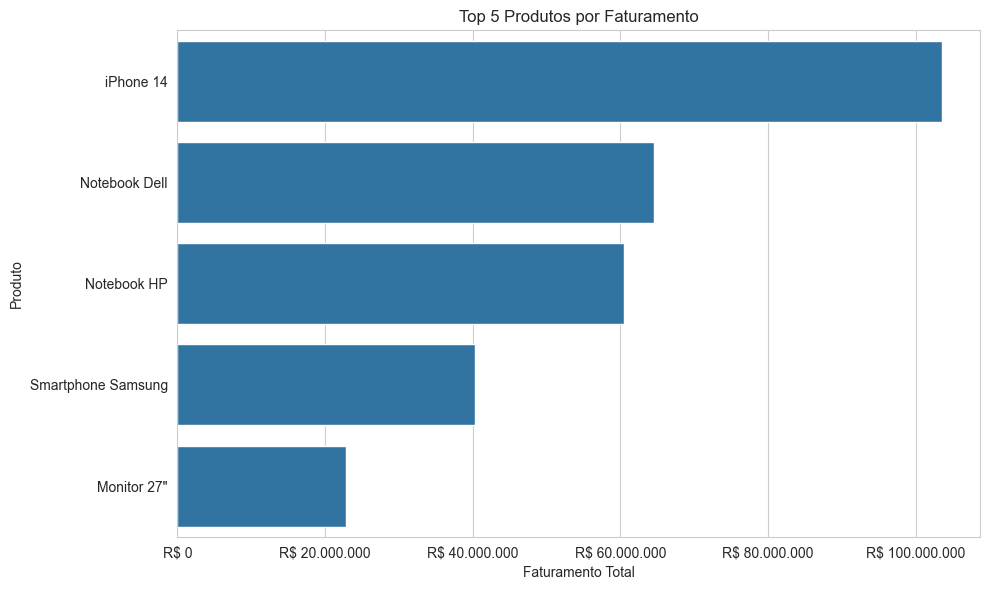

In [126]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=top_produtos_sql,
    x='Faturamento_Total',
    y='Produto'
)

plt.title('Top 5 Produtos por Faturamento')
plt.xlabel('Faturamento Total')
plt.ylabel('Produto')

formatter = ticker.FuncFormatter(lambda x, pos: f'R$ {int(x):,}'.replace(',', '.'))
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()




In [127]:
#Faturamento total por região
query = """
SELECT
    Regiao,
    SUM(Faturamento) AS Faturamento_Total
FROM vendas
GROUP BY Regiao
ORDER BY Faturamento_Total DESC;
"""

df_regiao_sql = pd.read_sql_query(query, conn)
display(df_regiao_sql)


,Regiao,Faturamento_Total
0,Sudeste,126100300.0
1,Nordeste,84491000.0
2,Sul,82800180.0
3,Online,6080850.0


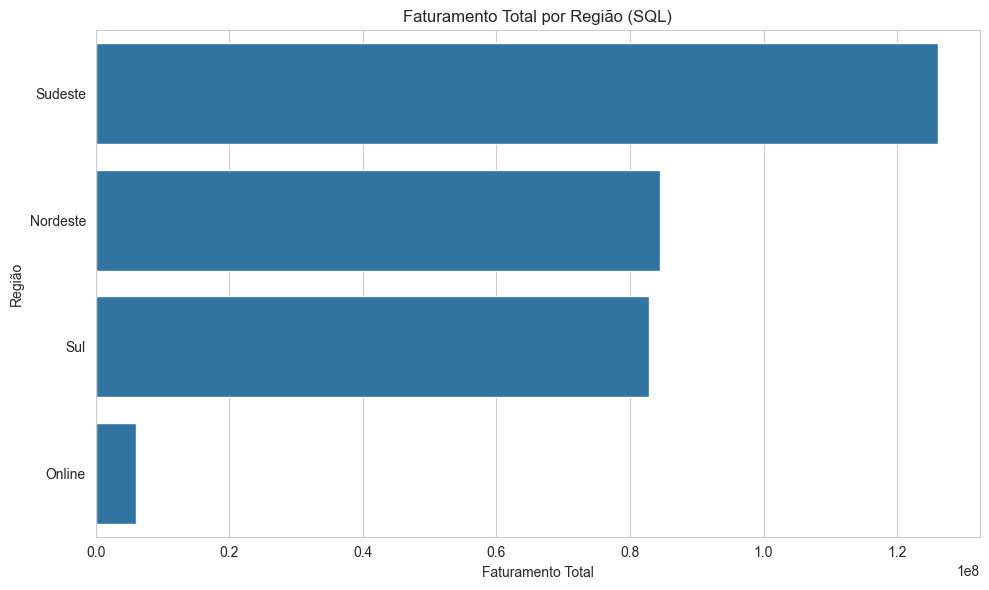

In [128]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_regiao_sql,
    x='Faturamento_Total',
    y='Regiao'
)

plt.title('Faturamento Total por Região (SQL)')
plt.xlabel('Faturamento Total')
plt.ylabel('Região')

plt.tight_layout()
plt.show()



In [129]:
#Ticket médio por loja
query = """
SELECT
  Loja,
  SUM(Faturamento) AS Faturamento_Total,
  COUNT(DISTINCT ID_Pedido) AS Qtde_Pedidos,
  ROUND(SUM(Faturamento) * 1.0 / COUNT(DISTINCT ID_Pedido), 2) AS Ticket_Medio
FROM vendas
GROUP BY Loja
ORDER BY Ticket_Medio DESC;
"""
df_ticket_loja = pd.read_sql_query(query, conn)
display(df_ticket_loja)


,Loja,Faturamento_Total,Qtde_Pedidos,Ticket_Medio
0,Online,6080850.0,2001,3038.91
1,Salvador,42300610.0,14024,3016.30
2,São Paulo,42090690.0,14013,3003.69
3,Porto Alegre,41678460.0,13884,3001.91
4,Rio De Janeiro,42294720.0,14099,2999.84
5,Recife,42190390.0,14113,2989.47
6,Belo Horizonte,41714890.0,13965,2987.10
7,Curitiba,41121720.0,13901,2958.18


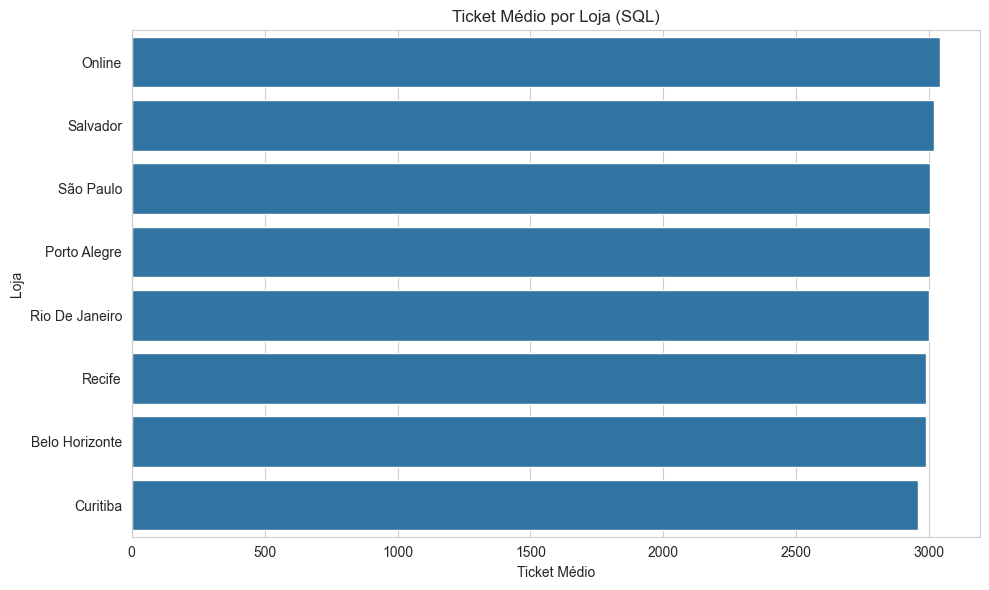

In [130]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_ticket_loja,
    x='Ticket_Medio',
    y='Loja'
)

plt.title('Ticket Médio por Loja (SQL)')
plt.xlabel('Ticket Médio')
plt.ylabel('Loja')

plt.tight_layout()
plt.show()


In [131]:
#Produto que fatura mais por região
query = """
WITH fat_por_regiao_produto AS (
  SELECT
    Regiao,
    Produto,
    SUM(Faturamento) AS Faturamento_Total
  FROM vendas
  GROUP BY Regiao, Produto
),
max_por_regiao AS (
  SELECT
    Regiao,
    MAX(Faturamento_Total) AS Max_Faturamento
  FROM fat_por_regiao_produto
  GROUP BY Regiao
)
SELECT
  f.Regiao,
  f.Produto,
  f.Faturamento_Total
FROM fat_por_regiao_produto f
JOIN max_por_regiao m
  ON f.Regiao = m.Regiao
 AND f.Faturamento_Total = m.Max_Faturamento
ORDER BY f.Regiao;
"""
df_top_produto_regiao = pd.read_sql_query(query, conn)
display(df_top_produto_regiao)


,Regiao,Produto,Faturamento_Total
0,Nordeste,iPhone 14,29276500.0
1,Online,iPhone 14,2145000.0
2,Sudeste,iPhone 14,43532500.0
3,Sul,iPhone 14,28556000.0


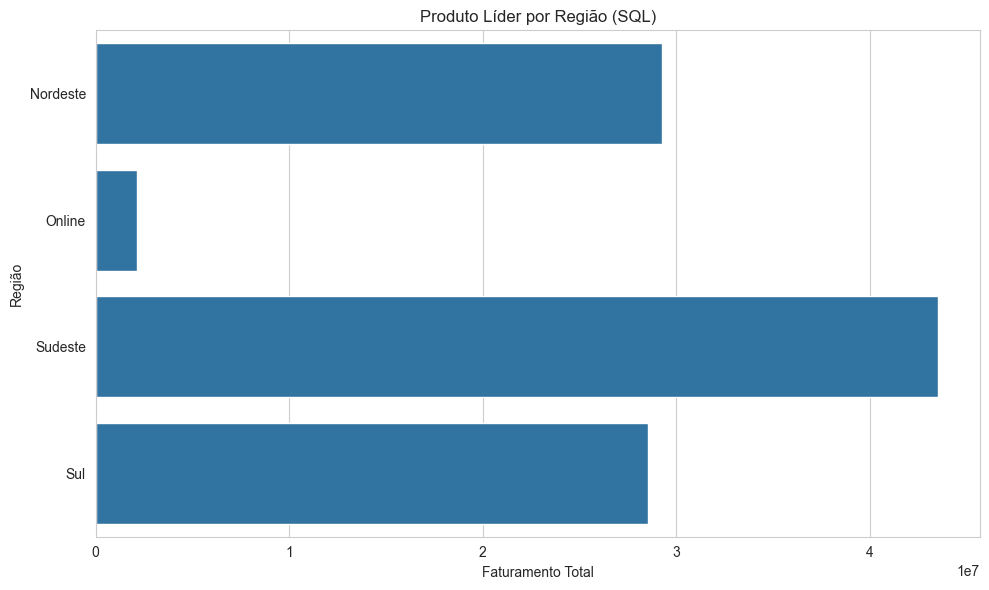

In [132]:
#Gráfico do produto líder em faturamento por região
plt.figure(figsize=(10,6))

sns.barplot(
    data=df_top_produto_regiao,
    x='Faturamento_Total',
    y='Regiao'
)

plt.title('Produto Líder por Região (SQL)')
plt.xlabel('Faturamento Total')
plt.ylabel('Região')

plt.tight_layout()
plt.show()


Machine Learning(Aprendizado de máquina)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [134]:

X = analisevendas[['Preco_Unitario', 'Qtd']]
y = analisevendas['Faturamento']


In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [136]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [137]:
y_pred = modelo.predict(X_test)


In [138]:
print("R²:", r2_score(y_test, y_pred))
print("Erro médio absoluto:", mean_absolute_error(y_test, y_pred))


R²: 0.7162649896592734
Erro médio absoluto: 1221.8775039211796


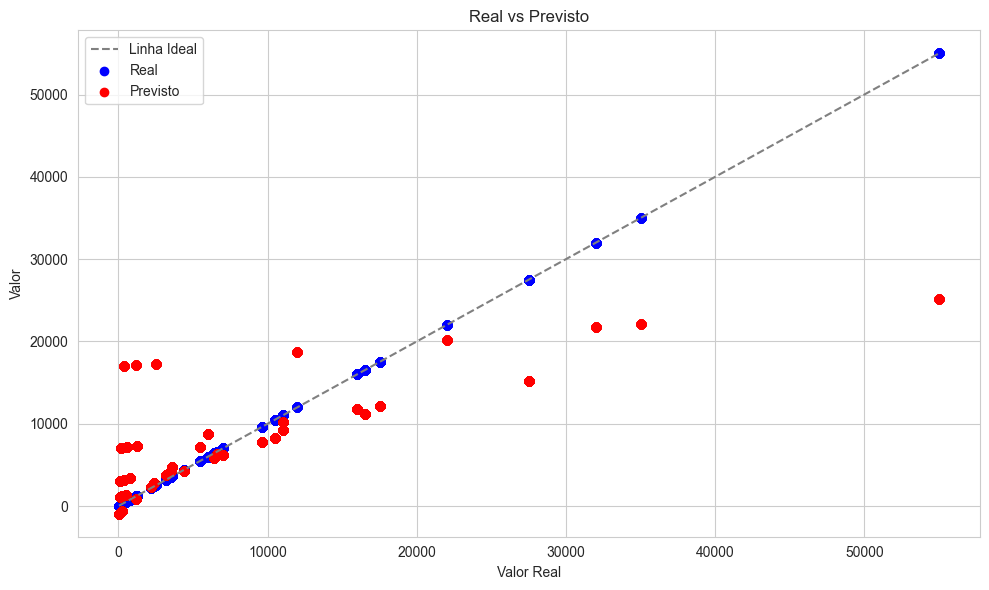

In [139]:
import matplotlib.pyplot as plt
import numpy as np

y_real = y
y_previsto = modelo.predict(X)

plt.figure(figsize=(10,6))

plt.plot(
    [min(y_real), max(y_real)],
    [min(y_real), max(y_real)],
    color='gray',
    linestyle='--',
    label='Linha Ideal'
)

plt.scatter(
    y_real,
    y_real,
    color='blue',
    label='Real'
)

plt.scatter(
    y_real,
    y_previsto,
    color='red',
    label='Previsto'
)

plt.title('Real vs Previsto')
plt.xlabel('Valor Real')
plt.ylabel('Valor')

plt.legend()
plt.tight_layout()
plt.show()



In [140]:
#Previsão mensal 
analisevendas['Mes_Ano'] = analisevendas['Data'].dt.to_period('M')

df_mensal = (
    analisevendas
    .groupby('Mes_Ano')['Faturamento']
    .sum()
    .reset_index()
)

df_mensal['Mes_Ano'] = df_mensal['Mes_Ano'].dt.to_timestamp()

display(df_mensal)


,Mes_Ano,Faturamento
0,2023-01-01,12930290.0
1,2023-02-01,11515150.0
2,2023-03-01,12516080.0
3,2023-04-01,12528900.0
4,2023-05-01,12940470.0
5,2023-06-01,12455820.0
6,2023-07-01,12550990.0
7,2023-08-01,12989130.0
8,2023-09-01,12118180.0
9,2023-10-01,12918990.0


In [141]:
df_mensal['Mes_Num'] = range(len(df_mensal))

display(df_mensal)


,Mes_Ano,Faturamento,Mes_Num
0,2023-01-01,12930290.0,0
1,2023-02-01,11515150.0,1
2,2023-03-01,12516080.0,2
3,2023-04-01,12528900.0,3
4,2023-05-01,12940470.0,4
5,2023-06-01,12455820.0,5
6,2023-07-01,12550990.0,6
7,2023-08-01,12989130.0,7
8,2023-09-01,12118180.0,8
9,2023-10-01,12918990.0,9


In [142]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df_mensal[['Mes_Num']]
y = df_mensal['Faturamento']

modelo = LinearRegression()
modelo.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [143]:

proximos_meses = 3
ultimo_mes = df_mensal['Mes_Num'].max()

novos_X = np.array(range(ultimo_mes + 1, ultimo_mes + 1 + proximos_meses)).reshape(-1, 1)

previsao = modelo.predict(novos_X)

previsao


c:\Users\Edna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12458731.95652174, 12457189.41304348, 12455646.86956522])

In [144]:

ultima_data = df_mensal['Mes_Ano'].max()

datas_futuras = pd.date_range(
    start=ultima_data + pd.DateOffset(months=1),
    periods=proximos_meses,
    freq='MS'
)

df_previsao = pd.DataFrame({
    'Mes_Ano': datas_futuras,
    'Previsao_Faturamento': previsao
})

display(df_previsao)


,Mes_Ano,Previsao_Faturamento
0,2025-01-01,1.245873e+07
1,2025-02-01,1.245719e+07
2,2025-03-01,1.245565e+07


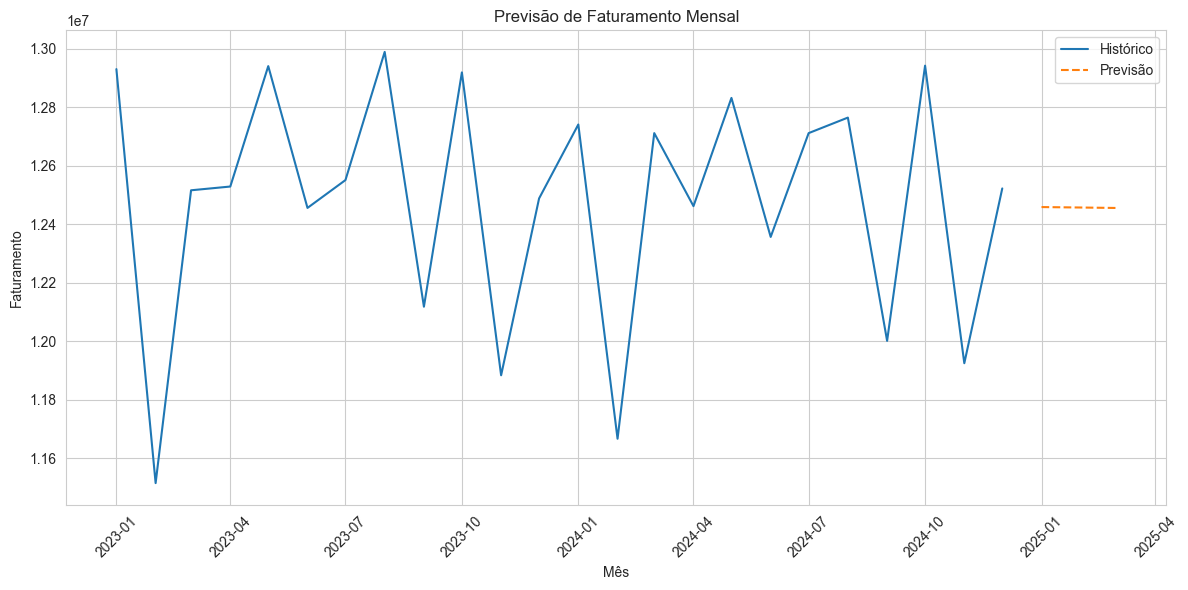

In [145]:


plt.figure(figsize=(12,6))

# Histórico
sns.lineplot(
    data=df_mensal,
    x='Mes_Ano',
    y='Faturamento',
    label='Histórico'
)

# Previsão
sns.lineplot(
    data=df_previsao,
    x='Mes_Ano',
    y='Previsao_Faturamento',
    label='Previsão',
    linestyle='--'
)

plt.title('Previsão de Faturamento Mensal')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [154]:
analisevendas.shape



(100000, 12)